In [ ]:
#---------------------------------------------------------------------------------------------
#                                    bioc_package names                                        
#---------------------------------------------------------------------------------------------
#                                                                                             
# [MoGene-1_1-st] - - - > mogene11sttranscriptcluster      
# [MoGene-1_0-st] - - - > mogene10sttranscriptcluster - - - >  GPL6246

In [14]:
source("affy_utils.R")

### Young and short-term:

In [6]:
gse_names <- c("GSE60596", "GSE68646","GSE50789",
               "GSE16790","GSE51885","GSE34773","GSE14202")

data_dir <- paste(getwd(), "data", sep="/")

In [7]:
#get raw data
get_raw(gse_names, data_dir)

[[1]]
  /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483027_Mouse_EF_CD-1.CEL.gz 
                                                                                            11118245 
  /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483028_Mouse_EF_CD-2.CEL.gz 
                                                                                            11124001 
  /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483029_Mouse_EF_CD-3.CEL.gz 
                                                                                            11128249 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483030_Mouse_EF_CR55-1.CEL.gz 
                                                                                            11119305 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483031_Mouse_EF_CR55-2.CEL.gz 
                                                                                            11117817 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483032_Mouse_EF_CR55-3.CEL.gz 
                                                                                            11134701 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483033_Mouse_EF_CR70-1.CEL.gz 
                                                                                            11123421 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483034_Mouse_EF_CR70-2.CEL.gz 
                                                                                            11129797 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483035_Mouse_EF_CR70-3.CEL.gz 
                                                                                            11120861 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483036_Mouse_EF_CR85-1.CEL.gz 
                                                                                            11121325 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483037_Mouse_EF_CR85-2.CEL.gz 
                                                                                            11124189 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483038_Mouse_EF_CR85-3.CEL.gz 
                                                                                            11133609 

[[2]]
 /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSM1678014_MOE4302_081607W_MH05_260.CEL.gz 
                                                                                                      10041665 
 /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSM1678015_MOE4302_081607W_MH06_261.CEL.gz 
                                                                                                      10041649 
 /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSM1678016_MOE4302_081607W_MH07_263.CEL.gz 
                                                                                                      10041537 
 /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSM1678017_MOE4302_081607W_MH08_264.CEL.gz 
                                                                                                      10041506 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSM1678018_MOE4302_081607W_MH14_261_.CEL.gz 
                                                                                                      10041386 
 /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSM1678019_MOE4302_081607W_MH09_282.CEL.gz 
                                                                                                      10041490 
 /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSM1678020_MOE4302_081607W_MH10_283.CEL.gz 
                                                                                   

In [8]:
#load esets
esets <- load_eset(gse_names, data_dir)

ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE60nnn/GSE60596/matrix/
Found 1 file(s)
GSE60596_series_matrix.txt.gz
Using locally cached version: /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSE60596_series_matrix.txt.gz
Using locally cached version of GPL6246 found here:
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GPL6246.soft 
Platform design info loaded.


Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483027_Mouse_EF_CD-1.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483028_Mouse_EF_CD-2.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483029_Mouse_EF_CD-3.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483030_Mouse_EF_CR55-1.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483031_Mouse_EF_CR55-2.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483032_Mouse_EF_CR55-3.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483033_Mouse_EF_CR70-1.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483034_Mouse_EF_CR70-2.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483035_Mouse_EF_CR70-3.CEL
Reading

ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE68nnn/GSE68646/matrix/
Found 1 file(s)
GSE68646_series_matrix.txt.gz
Using locally cached version: /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSE68646_series_matrix.txt.gz
Using locally cached version of GPL1261 found here:
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GPL1261.soft 
Loading required package: pd.mouse430.2
Platform design info loaded.


Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSM1678014_MOE4302_081607W_MH05_260.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSM1678015_MOE4302_081607W_MH06_261.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSM1678016_MOE4302_081607W_MH07_263.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSM1678017_MOE4302_081607W_MH08_264.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSM1678018_MOE4302_081607W_MH14_261_.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSM1678019_MOE4302_081607W_MH09_282.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSM1678020_MOE4302_081607W_MH10_283.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE68646/GSM1678021_MOE4302_081607W_MH11_284.CEL
Reading in : /home/alex/Documents/Batca

Loading required package: mouse430a2.db

ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE50nnn/GSE50789/matrix/
Found 1 file(s)
GSE50789_series_matrix.txt.gz
Using locally cached version: /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE50789/GSE50789_series_matrix.txt.gz
Using locally cached version of GPL1261 found here:
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE50789/GPL1261.soft 
Platform design info loaded.


Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE50789/GSM1229245_129_CO1.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE50789/GSM1229246_129_CO2.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE50789/GSM1229247_129_CO3.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE50789/GSM1229248_129_CO4.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE50789/GSM1229249_129_CO5.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE50789/GSM1229250_129_CO6.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE50789/GSM1229251_129_CO7.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE50789/GSM1229252_129_CO8.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE50789/GSM1229253_129_CR1.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GS

ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE16nnn/GSE16790/matrix/
Found 1 file(s)
GSE16790_series_matrix.txt.gz
Using locally cached version: /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE16790/GSE16790_series_matrix.txt.gz
Using locally cached version of GPL1261 found here:
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE16790/GPL1261.soft 
Platform design info loaded.


Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE16790/GSM421617.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE16790/GSM421618.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE16790/GSM421619.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE16790/GSM421620.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE16790/GSM421621.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE16790/GSM421622.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE16790/GSM421623.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE16790/GSM421624.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE16790/GSM421625.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE16790/GSM421626.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restri

ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE51nnn/GSE51885/matrix/
Found 1 file(s)
GSE51885_series_matrix.txt.gz
Using locally cached version: /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE51885/GSE51885_series_matrix.txt.gz
Using locally cached version of GPL1261 found here:
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE51885/GPL1261.soft 
Platform design info loaded.


Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE51885/GSM1254691_60__Fructose_1.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE51885/GSM1254692_60__Fructose_2.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE51885/GSM1254693_60__Fructose_3.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE51885/GSM1254694_Adjusted_Calories_1.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE51885/GSM1254695_Adjusted_Calories_2.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE51885/GSM1254696_Adjusted_Calories_3.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE51885/GSM1254697_AIN-93M_Purified_1.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE51885/GSM1254698_AIN-93M_Purified_2.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE51885/GSM1254699_AIN-93

ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE34nnn/GSE34773/matrix/
Found 1 file(s)
GSE34773_series_matrix.txt.gz
Using locally cached version: /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE34773/GSE34773_series_matrix.txt.gz
Using locally cached version of GPL1261 found here:
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE34773/GPL1261.soft 
Platform design info loaded.


Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE34773/GSM854980_1-control-flox.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE34773/GSM854981_2-control-flox.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE34773/GSM854982_3-control-flox.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE34773/GSM854983_4-control-flox.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE34773/GSM854984_5-control-flox.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE34773/GSM854985_6-control-flox.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE34773/GSM854986_7-control-mko.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE34773/GSM854987_8-control-mko.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE34773/GSM854988_9-control-mko.CEL
Reading in : /home/ale

ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE14nnn/GSE14202/matrix/
Found 1 file(s)
GSE14202_series_matrix.txt.gz
Using locally cached version: /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE14202/GSE14202_series_matrix.txt.gz
Using locally cached version of GPL339 found here:
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE14202/GPL339.soft 
Loading required package: pd.moe430a
Platform design info loaded.


Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE14202/GSM355022.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE14202/GSM355023.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE14202/GSM355024.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE14202/GSM355025.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE14202/GSM355026.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE14202/GSM355027.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE14202/GSM355028.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE14202/GSM355029.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE14202/GSM355030.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE14202/GSM355031.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restri

Loading required package: moe430a.db



Number of significant surrogate variables is:  2 
Iteration (out of 5 ):1  2  3  4  5  

CR55_fat-AL_fat (n significant): 241 
CR75_fat-AL_fat (n significant): 71 
CR85_fat-AL_fat (n significant): 0 


Number of significant surrogate variables is:  2 
Iteration (out of 5 ):1  2  3  4  5  

CR_muscle-AL_muscle (n significant): 23 




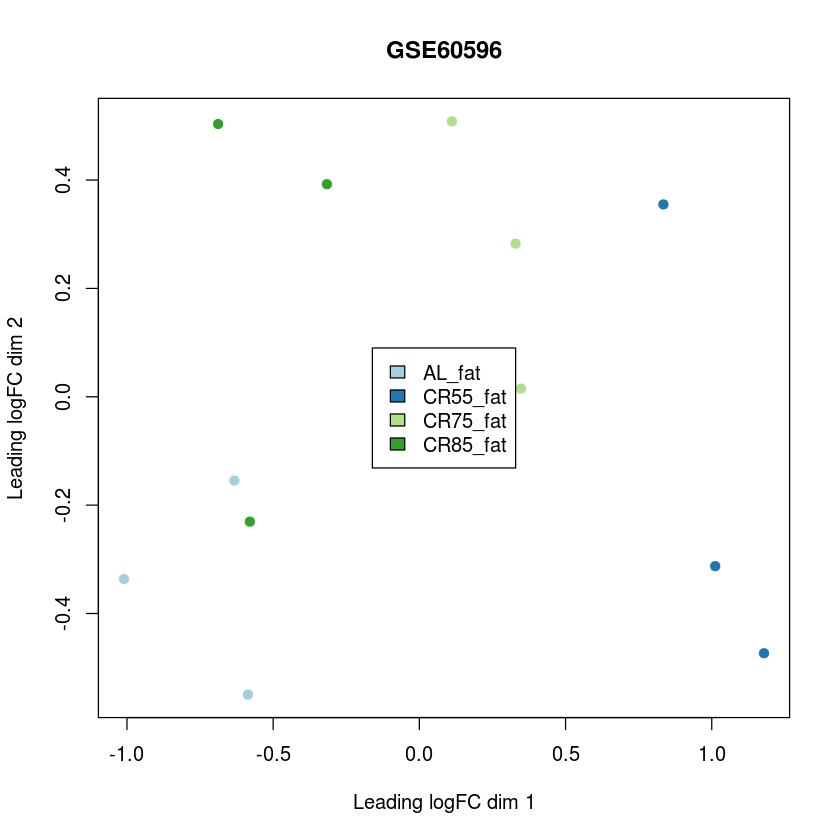

Number of significant surrogate variables is:  9 
Iteration (out of 5 ):1  2  3  4  5  

CR129_liver-AL129_liver (n significant): 213 
CRB6_liver-ALB6_liver (n significant): 70 
CRC3H_liver-ALC3H_liver (n significant): 119 
CRCBA_liver-ALCBA_liver (n significant): 160 
CRDBA_liver-ALDBA_liver (n significant): 98 
CRF1_liver-ALF1_liver (n significant): 139 




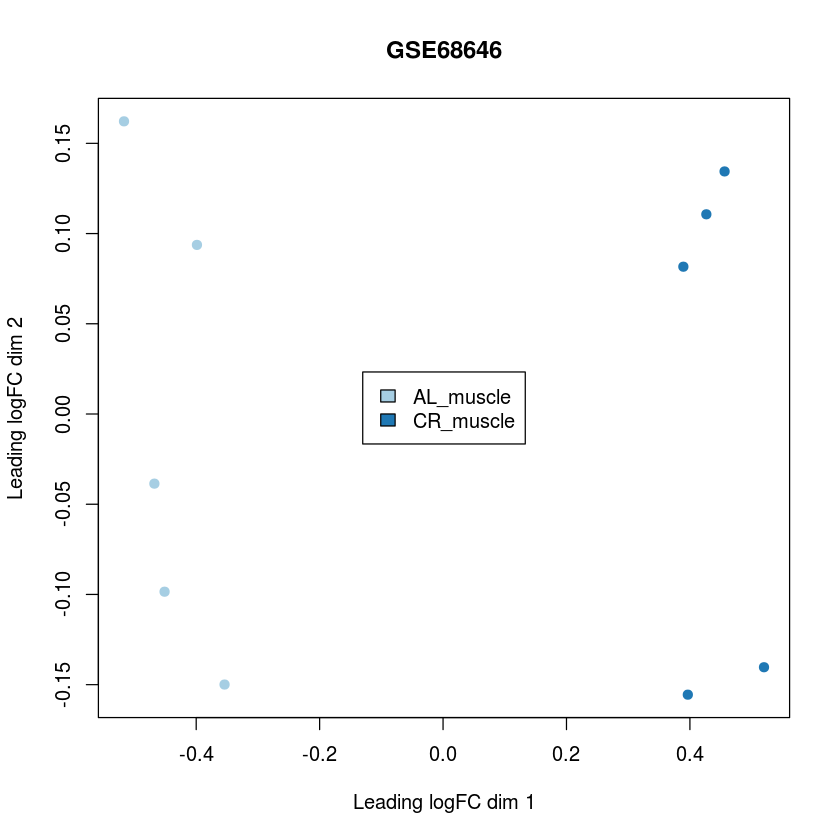

Number of significant surrogate variables is:  2 
Iteration (out of 5 ):1  2  3  4  5  

CRobob_heart-ALobob_heart (n significant): 14 




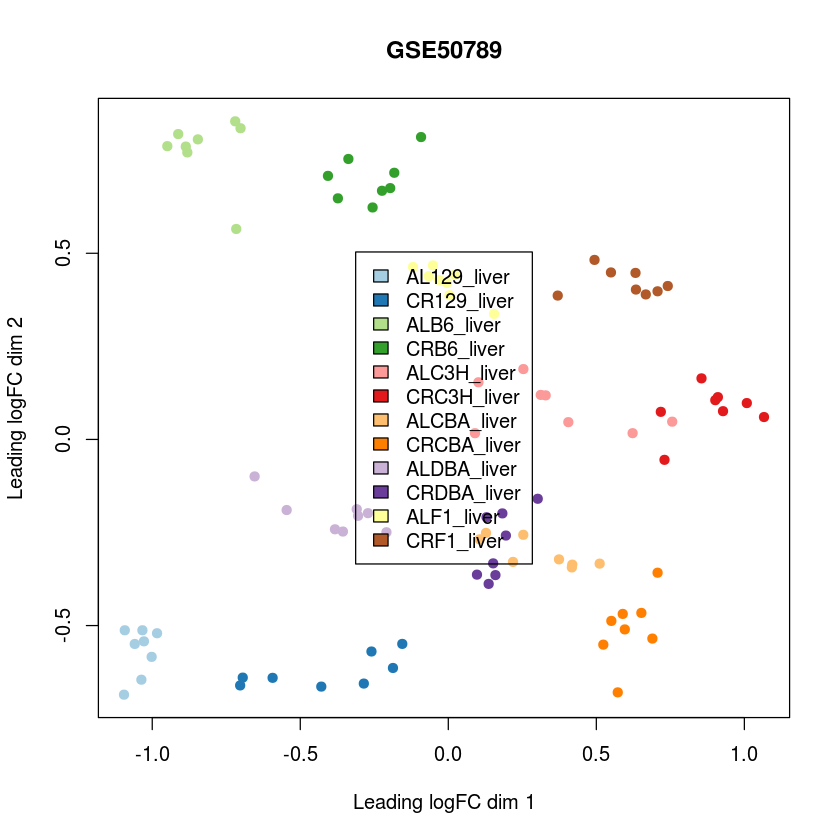

Number of significant surrogate variables is:  2 
Iteration (out of 5 ):1  2  3  4  5  

CR_liver-AL_liver (n significant): 3 




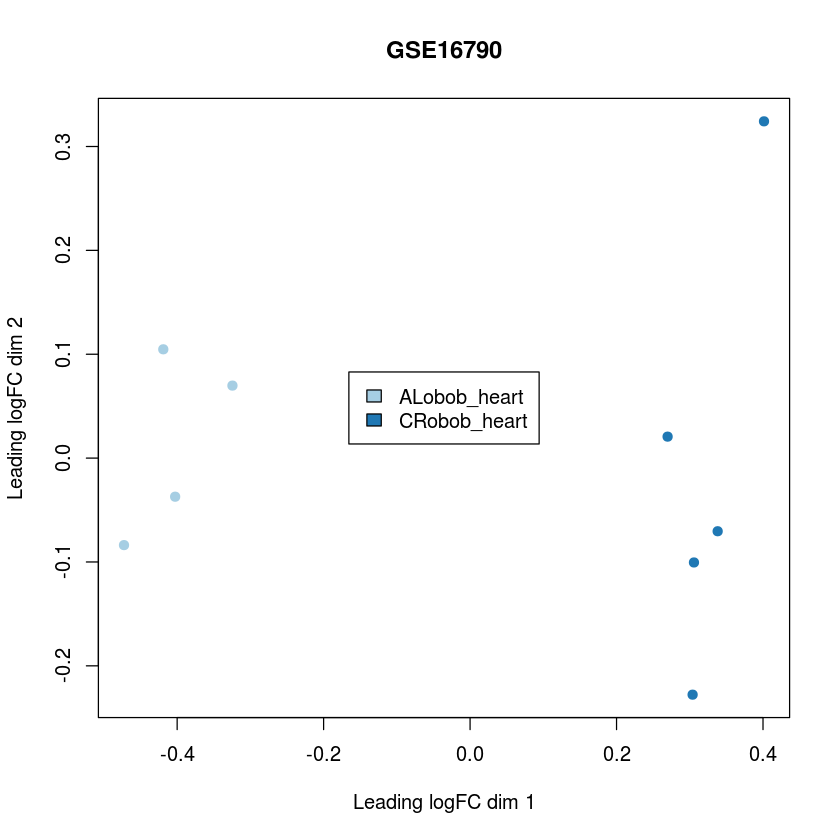

Number of significant surrogate variables is:  3 
Iteration (out of 5 ):1  2  3  4  5  

CR_muscle-AL_muscle (n significant): 11 




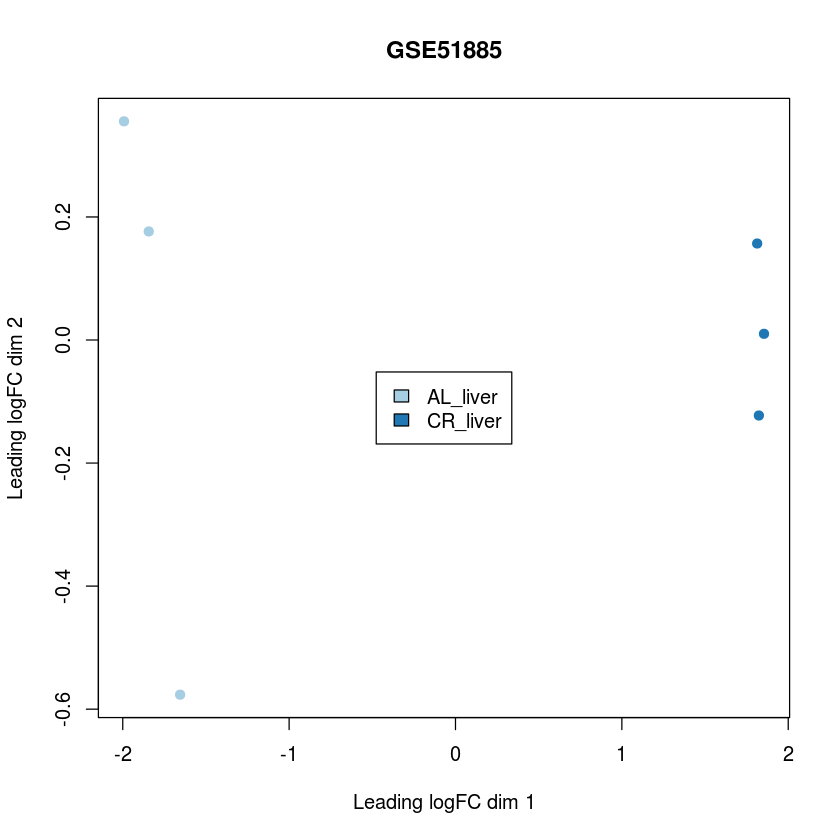

Number of significant surrogate variables is:  5 
Iteration (out of 5 ):1  2  3  4  5  

CR_breast-AL_breast (n significant): 5 
CREX_breast-AL_breast (n significant): 6 




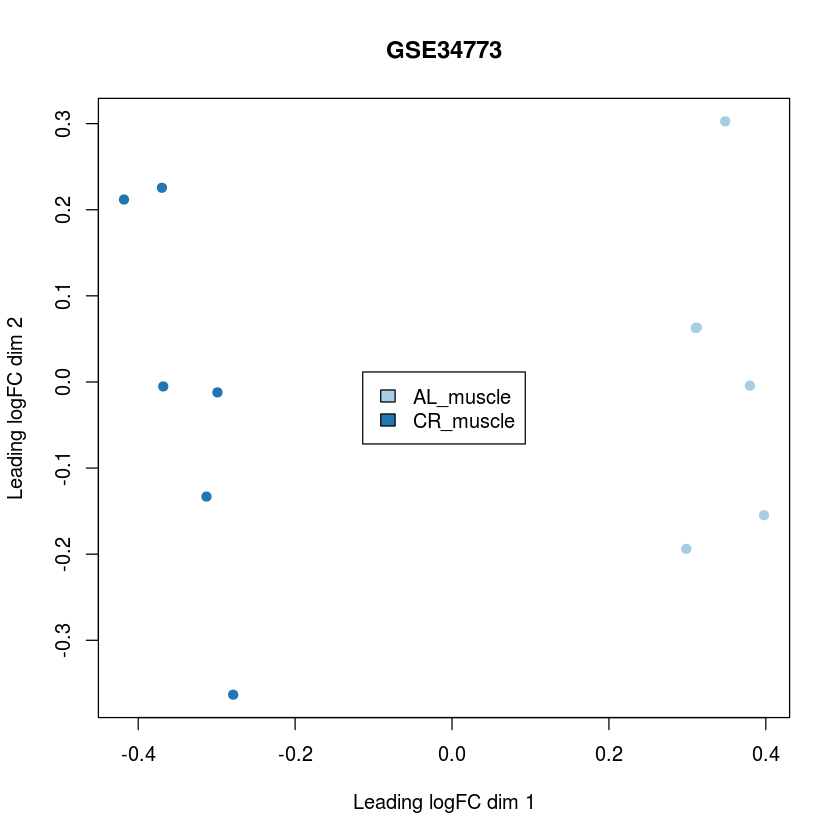

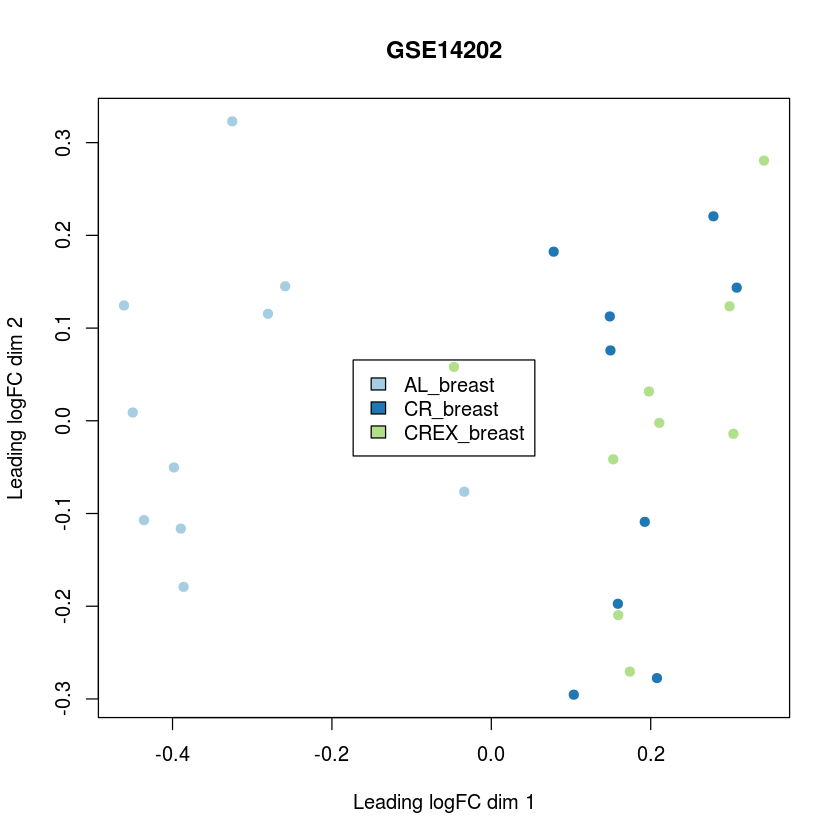

In [15]:
#differential expression
diff_exprs <- diff_expr(esets, data_dir)

### Old and long-term:

In [2]:
gse_names <- c("GSE61233", "GSE11291","GSE4786", "GSE6323")

data_dir <- paste(getwd(), "data", sep="/")

In [3]:
#get raw data
get_raw(gse_names, data_dir)

[[1]]
   /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499955_G150_B05_026_A2_3.CEL.gz 
                                                                                                 11803038 
   /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499956_G150_B06_027_A2_5.CEL.gz 
                                                                                                 11803038 
   /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499957_G150_B07_028_A2_7.CEL.gz 
                                                                                                 11803046 
  /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499958_G150_B08_031_A2_13.CEL.gz 
                                                                                                 11803054 
   /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499959_G150_B09_033_B2_5.CEL.gz 
                                                                                                 11803038 
   /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499960_G150_B10_035_B2_9.CEL.gz 
                                                                                                 11803038 
  /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499961_G150_B11_036_B2_11.CEL.gz 
                                                                                                 11803038 
  /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499962_G150_B12_037_B2_13.CEL.gz 
                                                                                                 11803078 
   /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499963_G150_C01_038_C2_1.CEL.gz 
                                                                                                 11803038 
   /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499964_G150_C02_039_C2_3.CEL.gz 
                                                                                                 11803046 
  /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499965_G150_C03_043_C2_11.CEL.gz 
                                                                                                 11803062 
  /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499966_G150_C04_044_C2_13.CEL.gz 
                                                                                                 11803094 
   /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499967_G150_C05_045_D2_1.CEL.gz 
                                                                                                 11803054 
   /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499968_G150_C06_046_D2_3.CEL.gz 
                                                                                                 11803046 
   /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499969_G150_C07_047_D2_5.CEL.gz 
                                                                                                 11803038 
  /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499970_G150_C08_051_D2_13.CEL.gz 
                                                                                                 11803038 
   /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499971_G151_B07_029_A2_9.CEL.gz 
                                                                                                 11803060 
  /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499972_G151_B09_030_A2_11.CEL.gz 
                                                                                                 11803052 
   /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499973_G151_C05_032_B2_3.CEL.gz 
                                   

In [4]:
#load esets
esets <- load_eset(gse_names, data_dir)

ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE61nnn/GSE61233/matrix/
Found 1 file(s)
GSE61233_series_matrix.txt.gz
Using locally cached version: /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSE61233_series_matrix.txt.gz
Using locally cached version of GPL11533 found here:
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GPL11533.soft 
Loading required package: pd.mogene.1.1.st.v1
Warning message:
In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, : there is no package called ‘pd.mogene.1.1.st.v1’Attempting to obtain 'pd.mogene.1.1.st.v1' from BioConductor website.
Checking to see if your internet connection works...



The downloaded source packages are in
	‘/tmp/Rtmpq3Vk6D/downloaded_packages’


Loading required package: pd.mogene.1.1.st.v1
Platform design info loaded.


Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499955_G150_B05_026_A2_3.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499956_G150_B06_027_A2_5.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499957_G150_B07_028_A2_7.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499958_G150_B08_031_A2_13.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499959_G150_B09_033_B2_5.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499960_G150_B10_035_B2_9.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499961_G150_B11_036_B2_11.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499962_G150_B12_037_B2_13.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE61233/GSM1499963_G1

Loading required package: mogene11sttranscriptcluster.db
Warning message:
In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, : there is no package called ‘mogene11sttranscriptcluster.db’Bioconductor version 3.2 (BiocInstaller 1.20.1), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.2 (BiocInstaller 1.20.1), R 3.2.3 (2015-12-10).
Installing package(s) ‘mogene11sttranscriptcluster.db’



The downloaded source packages are in
	‘/tmp/Rtmpq3Vk6D/downloaded_packages’


Old packages: 'boot', 'MASS', 'mgcv', 'nlme', 'spatial'
Loading required package: mogene11sttranscriptcluster.db
Loading required package: org.Mm.eg.db


ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE11nnn/GSE11291/matrix/
Found 1 file(s)
GSE11291_series_matrix.txt.gz
Using locally cached version: /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE11291/GSE11291_series_matrix.txt.gz
Using locally cached version of GPL1261 found here:
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE11291/GPL1261.soft 
Loading required package: pd.mouse430.2
Platform design info loaded.


Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE11291/GSM284967.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE11291/GSM284968.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE11291/GSM284969.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE11291/GSM284970.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE11291/GSM284971.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE11291/GSM284972.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE11291/GSM284973.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE11291/GSM284974.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE11291/GSM284975.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE11291/GSM284976.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restri

Loading required package: mouse430a2.db

ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE4nnn/GSE4786/matrix/
Found 1 file(s)
GSE4786_series_matrix.txt.gz
Using locally cached version: /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE4786/GSE4786_series_matrix.txt.gz
Using locally cached version of GPL1261 found here:
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE4786/GPL1261.soft 
Platform design info loaded.


Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE4786/GSM108100.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE4786/GSM108101.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE4786/GSM108102.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE4786/GSM108103.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE4786/GSM108104.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE4786/GSM108105.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE4786/GSM108106.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE4786/GSM108107.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE4786/GSM108108.CEL
Background correcting
Normalizing
Calculating Expression


ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE6nnn/GSE6323/matrix/
Found 1 file(s)
GSE6323_series_matrix.txt.gz
Using locally cached version: /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE6323/GSE6323_series_matrix.txt.gz
Using locally cached version of GPL339 found here:
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE6323/GPL339.soft 
Loading required package: pd.moe430a
Platform design info loaded.


Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE6323/GSM146340.cel
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE6323/GSM146341.cel
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE6323/GSM146342.cel
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE6323/GSM146343.cel
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE6323/GSM146344.cel
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE6323/GSM146345.cel
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE6323/GSM146346.cel
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE6323/GSM146347.cel
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE6323/GSM146348.cel
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE6323/GSM146349.cel
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data

Loading required package: moe430a.db

